In [27]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import glob
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import qutip
import theano
import theano.tensor as T
from collections import OrderedDict
import itertools
import os
import sys

src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

from qubit_network.QubitNetwork import QubitNetwork
import qubit_network as qn
import qubit_network.net_analysis_tools as nat
from utils import chop

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [298]:
nat.resave_all_pickle_as_json()

In [303]:
net_files = glob.glob('../data/nets/*.pickle')

data = []

for net_file in net_files:
    net = qn.load_network_from_file(net_file)
    
    try:
        data.append({})
        data[-1]['name'] = os.path.splitext(os.path.basename(net_file))[0]
        data[-1]['num_qubits'] = net.num_qubits
        data[-1]['fid'] = net.test_fidelity_without_theano(n_samples=100)
    except:
        print('An error was raised processing {}'.format(net_file))
        continue

pd.DataFrame(data)[['name', 'num_qubits', 'fid']]

An error was raised processing ../data/nets/CCrandomrandom_3q+1a_all.pickle
An error was raised processing ../data/nets/controlled_stuff.pickle
An error was raised processing ../data/nets/hadamard5qb.pickle


,name,num_qubits,fid
0,qft_3q+5a_all,8,0.987308
1,toffoli_Banchietal,4,0.997298
2,qft5qb,5,0.699329
3,hadamard,4,1.000000
4,fredkin,4,0.978781
5,qft_3q+1a_all_0.79f,4,0.798209
6,CCrandomrandom_3q+1a_all,4,NaN
7,fredkin_good,4,0.995381
8,halfadder_3q+1a_all_f998,4,0.998548
9,controlled_stuff,4,NaN


Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


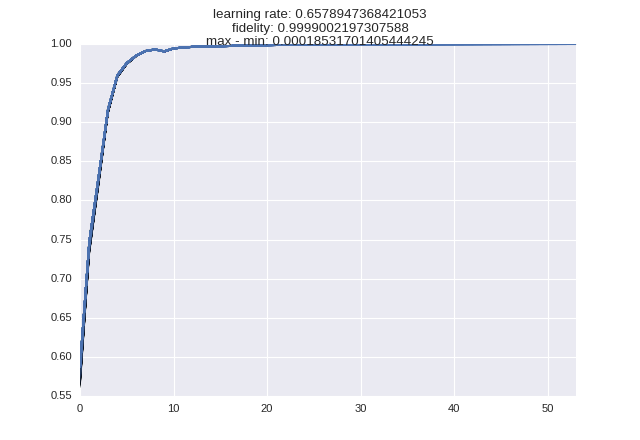

Finished training
Final fidelity: 0.9999000831720375


In [28]:
net = QubitNetwork(
    num_qubits=3,
    system_qubits=3,
    interactions='all'
#     J=new_Jvalues
)
qn.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=500,
    batch_size=10,
    target_gate=qutip.toffoli(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

<IPython.core.display.Javascript object>


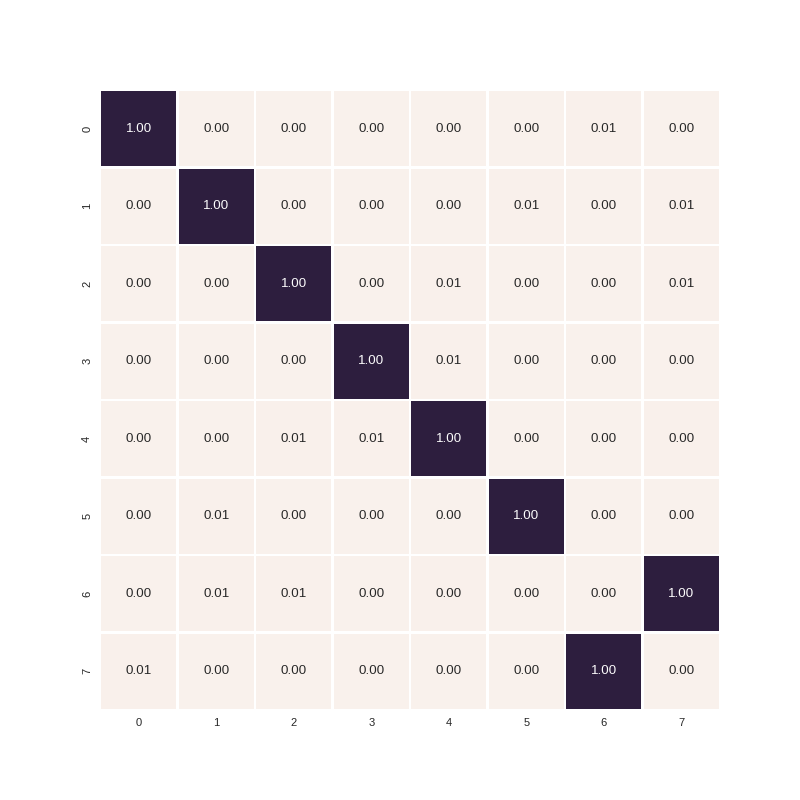

In [47]:
toffoli_net = qn.load_network_from_file('../data/nets/toffoli_3q_all_0.9999fid.pickle')
qn.plot_gate(toffoli_net)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


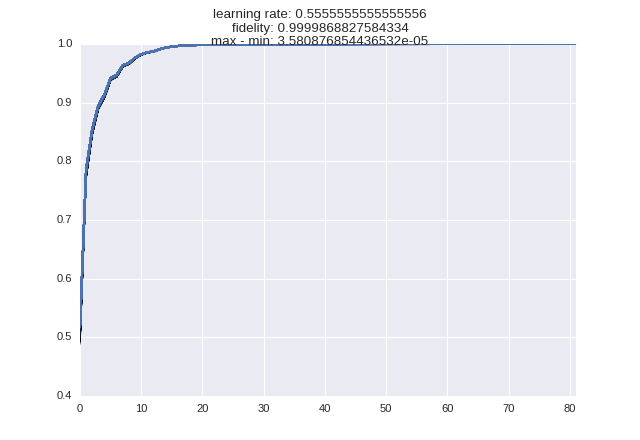

Finished training
Final fidelity: 0.9999870129729205


In [41]:
net = QubitNetwork(
    num_qubits=3,
    system_qubits=3,
    interactions='all'
#     J=new_Jvalues
)
qn.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=500,
    batch_size=10,
    target_gate=qutip.fredkin(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

<IPython.core.display.Javascript object>


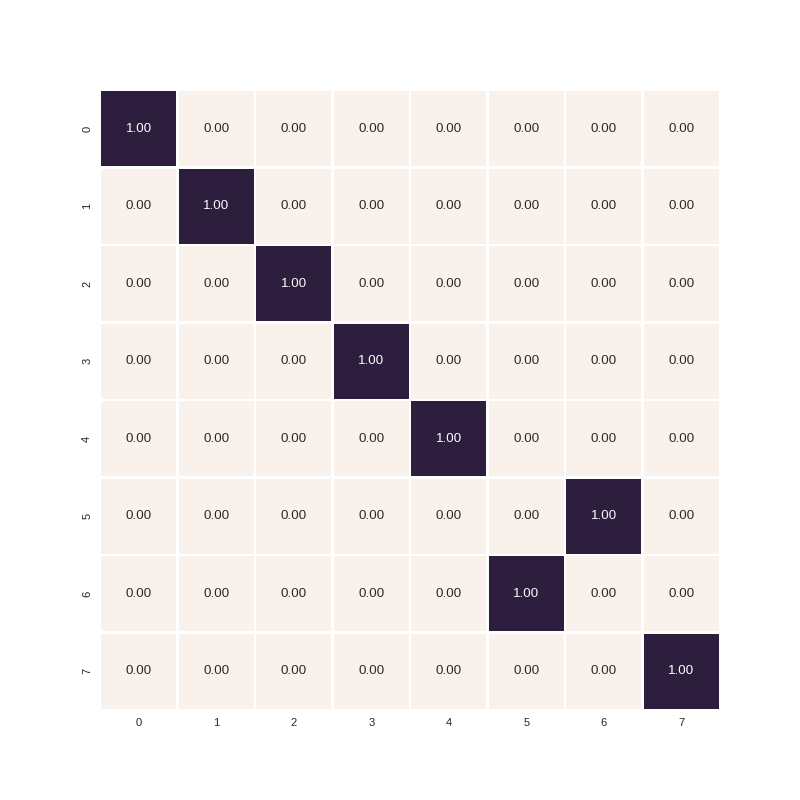

In [48]:
fredkin_net = qn.load_network_from_file('../data/nets/fredkin_3q_all_0.9999fid.pickle')
qn.plot_gate(fredkin_net)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


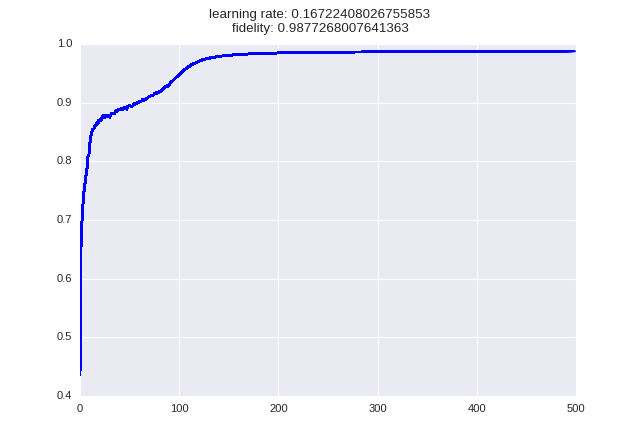

Finished training
Final fidelity: 0.988839491929984


In [165]:
net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions='all'
#     J=new_Jvalues
)
qn.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=500,
    batch_size=10,
    target_gate=qutip.toffoli(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

In [44]:
qn.plot_gate(net, permutation=[3, 0, 1, 2])

2

<IPython.core.display.Javascript object>


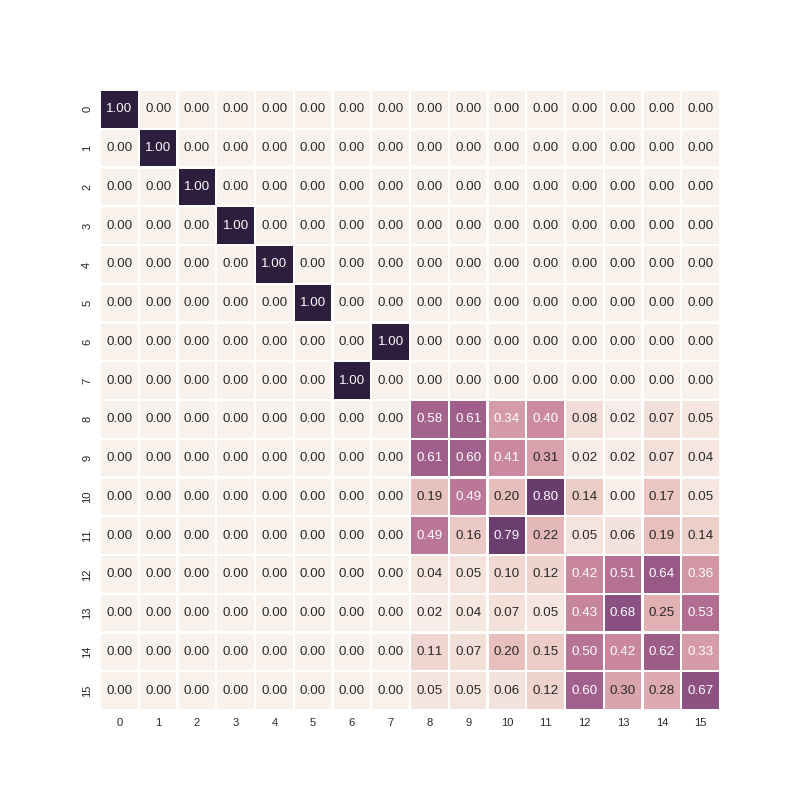

In [192]:
qn.plot_gate(othernet, permutation=[3, 0, 1, 2])

In [13]:
[[2] * 3] * 2
qutip.tensor(qutip.sigmax(), qutip.sigmax(), qutip.sigmax())

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]]

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


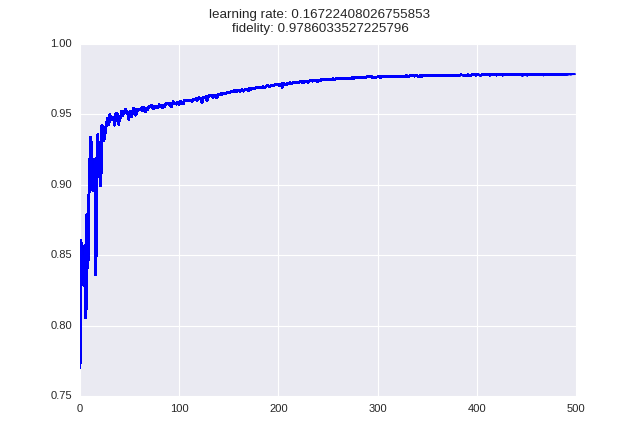

Finished training
Final fidelity: 0.9796845401087426


In [15]:
import scipy
theta = 0.3
generator = qutip.tensor(qutip.sigmax(), qutip.sigmax(), qutip.sigmax()).data.toarray()
target_gate = scipy.linalg.expm(1j * theta * generator)
target_gate = qutip.Qobj(target_gate, dims=([[2] * 3] * 2))

net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions='all'
#     J=new_Jvalues
)
qn.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=500,
    batch_size=10,
    target_gate=target_gate,
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

In [19]:
net.save_to_file('../data/nets/xxx.json', fmt='json')

<IPython.core.display.Javascript object>


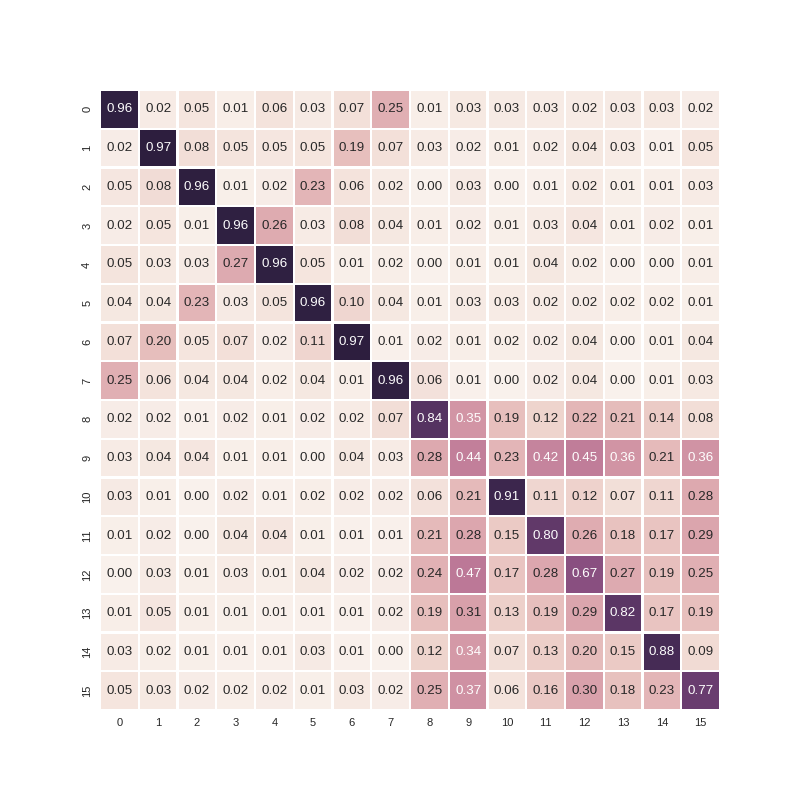

In [21]:
qn.plot_gate(net, permutation=[3, 0, 1, 2])

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


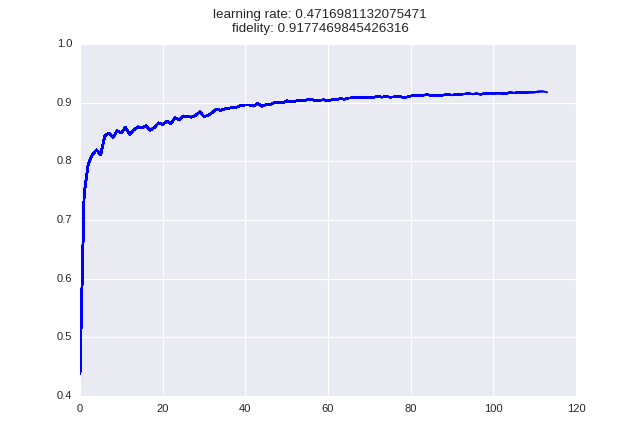

Finished training
Final fidelity: 0.931952228742445


In [22]:
theta = 0.5
generator = qutip.tensor(qutip.sigmax(), qutip.sigmax(), qutip.sigmax()).data.toarray()
target_gate = scipy.linalg.expm(1j * theta * generator)
target_gate = qutip.Qobj(target_gate, dims=([[2] * 3] * 2))

net2 = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions='all'
#     J=new_Jvalues
)
qn.sgd_optimization(
    net=net2,
    learning_rate=1,
    n_epochs=500,
    batch_size=10,
    target_gate=target_gate,
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


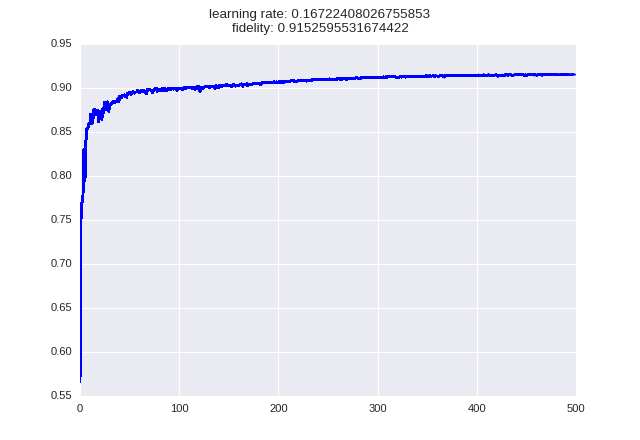

Finished training
Final fidelity: 0.8965467791388925


In [78]:
theta = 0.5
generator = qutip.tensor(qutip.sigmax(), qutip.sigmax(), qutip.sigmax()).data.toarray()
target_gate = scipy.linalg.expm(1j * theta * generator)
target_gate = qutip.Qobj(target_gate, dims=([[2] * 3] * 2))

net2 = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions='all'
#     J=new_Jvalues
)
qn.sgd_optimization(
    net=net2,
    learning_rate=1,
    n_epochs=500,
    batch_size=10,
    target_gate=target_gate,
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

<IPython.core.display.Javascript object>


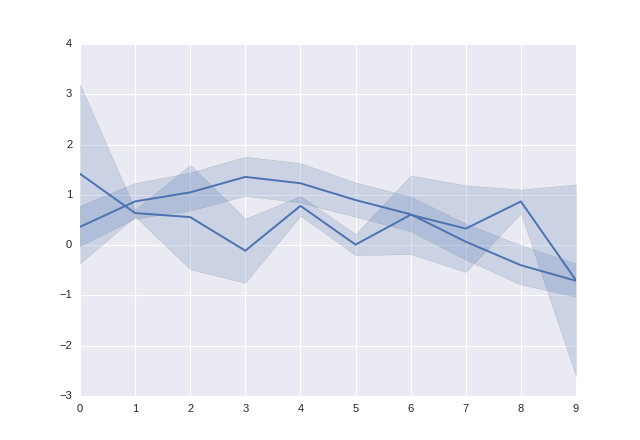

In [128]:
x = np.linspace(0, 15, 31)
data = np.sin(x) + np.random.rand(10, 31) + np.random.randn(10, 1)
plt.figure()
ax = sns.tsplot(data=data)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


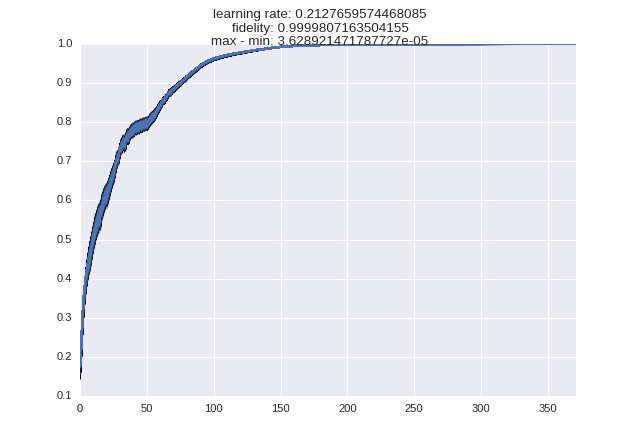

Finished training
Final fidelity: 0.9999816970868486


In [7]:
import scipy
theta = np.pi / 2.
generator = qutip.tensor(qutip.sigmax(), qutip.sigmax(), qutip.sigmax()).data.toarray()
target_gate = scipy.linalg.expm(1j * theta * generator)
target_gate = qutip.Qobj(target_gate, dims=([[2] * 3] * 2))

net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions='all'
#     J=new_Jvalues
)
qn.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=500,
    batch_size=10,
    target_gate=target_gate,
    training_dataset_size=100,
    test_dataset_size=200,
    decay_rate=.01
)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


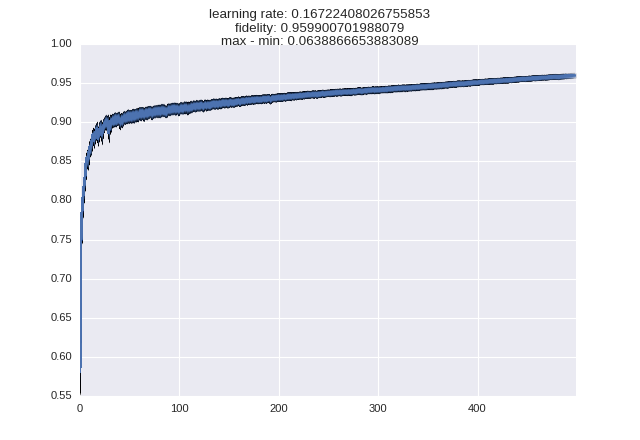

Finished training
Final fidelity: 0.9664672482880043


In [3]:
import scipy
theta = 0.5
generator = qutip.tensor(qutip.sigmax(), qutip.sigmax(), qutip.sigmax()).data.toarray()
target_gate = scipy.linalg.expm(1j * theta * generator)
target_gate = qutip.Qobj(target_gate, dims=([[2] * 3] * 2))

net2 = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions='all'
#     J=new_Jvalues
)
qn.sgd_optimization(
    net=net2,
    learning_rate=1,
    n_epochs=500,
    batch_size=10,
    target_gate=target_gate,
    training_dataset_size=100,
    test_dataset_size=200,
    decay_rate=.01
)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


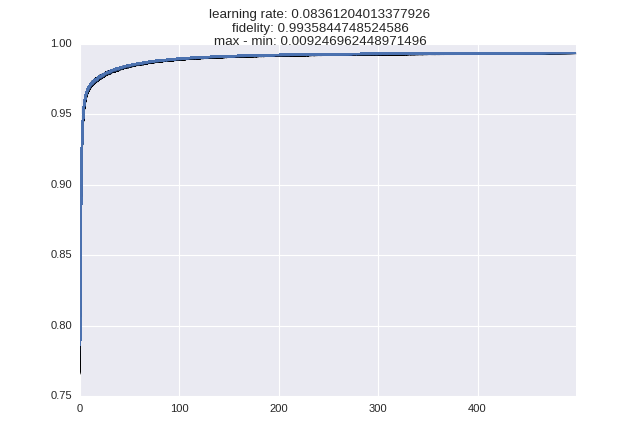

Finished training
Final fidelity: 0.9929859867494462


In [5]:
qn.sgd_optimization(
    net=net2,
    learning_rate=.5,
    n_epochs=500,
    batch_size=10,
    target_gate=target_gate,
    training_dataset_size=100,
    test_dataset_size=200,
    decay_rate=.01
)

In [6]:
net2.save_to_file('../data/nets/xxx_20170410.pickle', fmt='pickle')
net2.save_to_file('../data/nets/xxx_20170410.json', fmt='json')

<IPython.core.display.Javascript object>


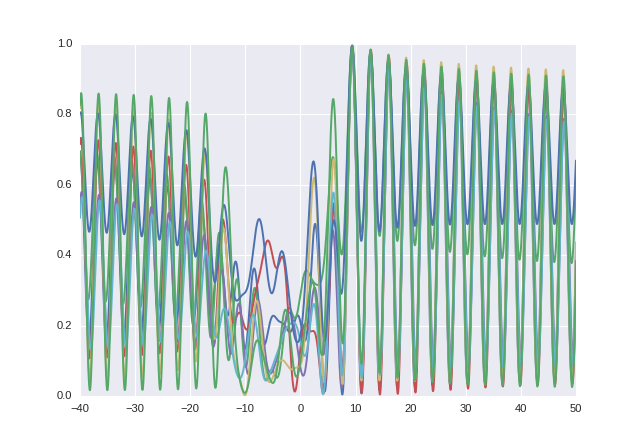

In [10]:
nat.plot_fidelity_vs_J_live(net_xxx, np.arange(-40, 50, 0.01), 0, n_states=8)

In [4]:
net_xxx = qn.load_network_from_file('../data/nets/xxx_20170410.pickle')

In [5]:
net_xxx.test_fidelity_without_theano()

0.99355813459226749

In [22]:
qn.load_network_from_file('../data/nets/halfadder_3q+1a_all_f998.pickle').\
    test_fidelity_without_theano()

0.99849028552746488

In [71]:
net2.get_interactions_with_Js()

OrderedDict([((0, 'x'), 9.9899999999995757),
             ((0, 'y'), 1.4936494950508787),
             ((0, 'z'), 2.0786123592827188),
             ((1, 'x'), 1.6355846814222463),
             ((1, 'y'), 0.81970525079545675),
             ((1, 'z'), -0.41350614024942317),
             ((2, 'x'), 1.8946467452977769),
             ((2, 'y'), -0.17660218343099529),
             ((2, 'z'), -1.4757953280051055),
             ((3, 'x'), -0.0030606966083556544),
             ((3, 'y'), -0.0015761624588435902),
             ((3, 'z'), -4.7527016775864439),
             (((0, 1), 'xx'), -3.545680477375206),
             (((0, 1), 'xy'), 0.001406347952217126),
             (((0, 1), 'xz'), -0.025153028022722835),
             (((0, 1), 'yx'), -0.31373211242688542),
             (((0, 1), 'yy'), 0.13432163807959818),
             (((0, 1), 'yz'), 0.16654013788457703),
             (((0, 1), 'zx'), -0.19009547348126632),
             (((0, 1), 'zy'), -0.10996606057127188),
             (((0, 1), '

In [28]:
net2.save_to_file('../data/nets/xxx2.json', fmt='json')